## Surrogate Gradient Method
As mentioned in Neuron, the Heaviside function is used to describe the neuronal firing. Its derivative is the unit impulse function. If we use the unit impulse function to calculate the gradient and apply the gradient descent, the training will be very unstable. To solve this problem, the surrogate gradient method is proposed.

The surrogate gradient method uses $\Theta$ in forward and $\frac{dy}{dx}=\sigma'(x)$ rather than $\frac{dy}{dx}=\Theta'(x)$ in backward, where is the surrogate function. In most cases, is a continuous and smooth function whose shape is similar to  `spikingjelly.activation_based.surrogate` provides many frequently-used surrogate functions. For example, the Sigmoid function `spikingjelly.activation_based.surrogate.Sigmoid` is $\sigma(x, \alpha)=\frac{1}{1+exp(-\alpha x)}$.The following figure shows the primitive Heaviside function, the sigmoid function when alpha=5 and its gradient:
We can use the surrogate function easily, just as we use other functions:

In [2]:
import torch
from spikingjelly.activation_based import surrogate
from matplotlib import pyplot as plt

x=tensor([ 1.7250e-01, -9.1771e-02,  1.6519e-01,  5.2234e-03,  6.6777e-02,
        -9.7752e-06, -1.7322e-01, -2.0254e-02], requires_grad=True)
y=tensor([1., 0., 1., 1., 1., 0., 0., 0.], grad_fn=<sigmoidBackward>)
x.grad=tensor([0.8898, 0.9671, 0.8983, 0.9999, 0.9824, 1.0000, 0.8890, 0.9984])


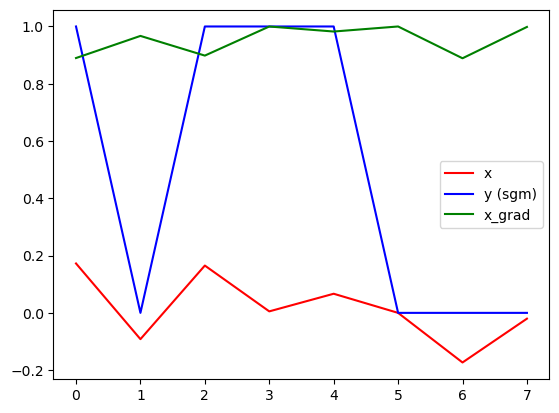

In [10]:
sg = surrogate.Sigmoid(alpha=4.)

x = torch.rand([8]) - 0.5
x.requires_grad = True
y = sg(x)
y.sum().backward()

print(f'x={x}')
print(f'y={y}')
print(f'x.grad={x.grad}')
plt.plot(x.detach().numpy(), color='r')
plt.plot(y.detach().numpy(), color='b')
plt.plot(x.grad.detach().numpy(), color='g')
plt.legend(['x','y (sgm)','x_grad'])
plt.show()

Most surrogate functions have one or many hyper-parameters to control the shape, e.g., `alpha` of `spikingjelly.activation_based.surrogate.Sigmoid`. In SpikingJelly, the default shape hyper-parameters are set to make the maximum of the surrogate function’s gradient to be 1, which can relieve the gradient vanishing or exploding problem caused by the cumulative product of gradients.